<a href="https://colab.research.google.com/github/Ronimol23/Ronimol23/blob/main/retailer_quest_to_find_higherearners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, Dataa and Directory

In [30]:
# LIbraries
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns

In [31]:
#Directory
%cd /content/drive/MyDrive/Predictive Analytics/Random Forest

/content/drive/MyDrive/Predictive Analytics/Random Forest


In [32]:
# Loading data
df = pd.read_csv('marketing_campaign.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


# Data Preparation

In [33]:
# removing unwanted data
df = df.iloc[:, 2:]
df = df.drop(columns=['Dt_Customer', 'Recency'])


In [34]:
# Transorm year of birth
df['Age'] = 2020 - df['Year_Birth']
df = df.drop(columns='Year_Birth')

In [35]:
#Transform Objects
df = pd.get_dummies(df, drop_first = True)

In [ ]:
#NAs
df = df.dropna()
df.isna().sum()

In [37]:
#Isolate x and y
y = df.Income
x = df.drop(columns= ['Income'])


In [38]:
#Splitting the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,
                                                    random_state= 1502)

# Random Forest

In [39]:
# Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators= 300,
                               random_state= 1502)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1502)

# Model Accuracy Assessment

In [40]:
#Predictions
predictions = model.predict(x_test)
predictions[:5]

array([66488.74      , 19450.09666667, 64682.58      , 49538.68666667,
       47827.66666667])

In [41]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(mae)
y_mean = y_test.mean()
print(y_mean)
print(y_test.std())

6543.338626126127
50734.41891891892
22073.552789063204


# Feature Importance

<AxesSubplot:>

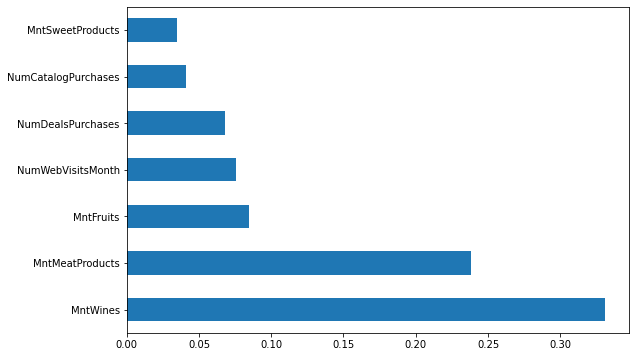

In [42]:
# Importance Plot
importance = pd.Series(model.feature_importances_,
                       index = x_train.columns.values)
importance.nlargest(7).plot(kind= 'barh',
                            figsize=(9, 6))

# Parameter Tuning

In [50]:
from sklearn.model_selection import ParameterGrid
param_grid = {'n_esitmators': range(5, 500, 20)}
grid = ParameterGrid(param_grid)

In [51]:
# Where to store
mae = []

# Start the Loop
for params in grid:

  #model building 
  model = RandomForestRegressor(n_estimators= params['n_esitmators'],
                                random_state = 1502)
  model.fit(x_train, y_train)
  
  #Predicitons
  predictions = model.predict(x_test)

  #Asses Accuracy
  ma_error = mean_absolute_error(y_test, predictions)

  #Store results
  mae.append(ma_error)

In [52]:
# Best Parameters
best_params = grid[np.argmin(ma_error)]
print(best_params)

{'n_esitmators': 5}
